In [2]:
import pyzx as zx
import random
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, ParameterVector
import csv
import time
import japanize_matplotlib # 追加

In [3]:
def generate_H_S_CNOT_T_circuit(qubits, gates, p_t=0, seed=1000):
    random.seed(seed)  
    p_s = 0.333 * (1.0 - p_t)  
    p_had = 0.333 * (1.0 - p_t)  
    p_cnot = 0.333 * (1.0 - p_t)  

    c = zx.Circuit(qubits) 
    for _ in range(gates):
        r = random.random() 
        if r < p_had:
            c.add_gate("HAD", random.randrange(qubits))
        elif r < p_had + p_s:
            c.add_gate("S", random.randrange(qubits))
        elif r < p_had + p_s + p_t:
            c.add_gate("T", random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl != tgt:
                    break
            c.add_gate("CNOT", tgt, ctrl)
    return c

In [ ]:
c = generate_H_S_CNOT_T_circuit(4, 1000, p_t=0.4, seed=1000)

print("original")
print(c.stats_dict())

print("phaseのみ")
g2 = c.to_graph()
g2 = zx.teleport_reduce(g2)
print(zx.Circuit.from_graph(g2).stats_dict())

print("後処理後")
c2 = zx.Circuit.from_graph(g2)
c2 = zx.optimize.basic_optimization(c2)
print(c2.stats_dict())


original
{'name': '', 'qubits': 4, 'gates': 1000, 'tcount': 425, 'clifford': 575, 'twoqubit': 207, 'cnot': 207, 'had': 177, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
phaseのみ


AttributeError: module 'pyzx' has no attribute 'phase_reduce'

In [16]:
c = generate_H_S_CNOT_T_circuit(4, 1000, p_t=0.4, seed=1000)

print("original")
print(c.stats_dict())


print("after pre-processing_full")
#c = zx.optimize.basic_optimization(c)
c = zx.optimize.full_optimize(c)
print(c.stats_dict())

g = c.to_graph()
print("after teleportation")
g2 = zx.teleport_reduce(g)
c = zx.Circuit.from_graph(g2)
#zx.draw(c.to_graph())
print(c.stats_dict())

c = zx.optimize.basic_optimization(c.copy())
print("basic")
#zx.draw(c.to_graph()) 
print(c.stats_dict())

print("full")
c = zx.optimize.full_optimize(c.copy())
print(c.stats_dict())

print("todd")
c = zx.optimize.phase_block_optimize(c.copy())
print(c.stats_dict())

original
{'name': '', 'qubits': 4, 'gates': 1000, 'tcount': 425, 'clifford': 575, 'twoqubit': 207, 'cnot': 207, 'had': 177, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
after pre-processing_full
{'name': '', 'qubits': 4, 'gates': 530, 'tcount': 117, 'clifford': 413, 'twoqubit': 247, 'cnot': 214, 'had': 99, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
after teleportation
{'name': '', 'qubits': 4, 'gates': 582, 'tcount': 117, 'clifford': 465, 'twoqubit': 247, 'cnot': 214, 'had': 99, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
basic
{'name': '', 'qubits': 4, 'gates': 530, 'tcount': 117, 'clifford': 413, 'twoqubit': 247, 'cnot': 214, 'had': 99, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
full
{'name': '', 'qubits': 4, 'gates': 508, 'tcount': 117, 'clifford': 391, 'twoqubit': 242, 'cnot': 206, 'had': 97, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
todd
{'name': '', 'qubits': 4, 'gates': 661, 'tcount': 117, 'clifford': 544, 'twoq

original
{'name': '', 'qubits': 4, 'gates': 50, 'tcount': 26, 'clifford': 24, 'twoqubit': 8, 'cnot': 8, 'had': 10, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


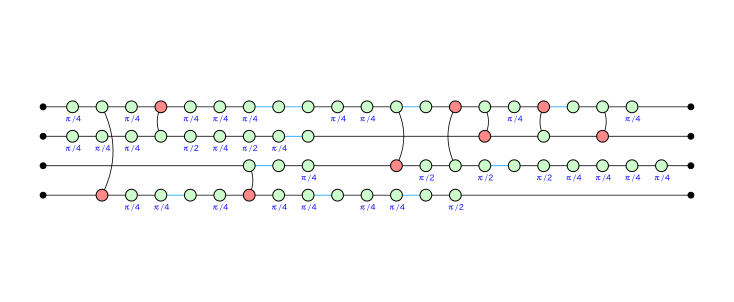

In [20]:
#画像取得

c = generate_H_S_CNOT_T_circuit(4, 50, p_t=0.4, seed=1001)

print("original")
print(c.stats_dict())
zx.draw_matplotlib(c.to_graph(),figsize=(10, 4))

original
{'name': '', 'qubits': 4, 'gates': 50, 'tcount': 26, 'clifford': 24, 'twoqubit': 8, 'cnot': 8, 'had': 10, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


after teleportation
{'name': '', 'qubits': 4, 'gates': 40, 'tcount': 6, 'clifford': 34, 'twoqubit': 8, 'cnot': 8, 'had': 10, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


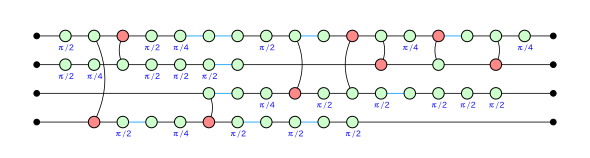

In [24]:
#画像取得

c = generate_H_S_CNOT_T_circuit(4, 50, p_t=0.4, seed=1001)

print("original")
print(c.stats_dict())
#zx.draw_matplotlib(c.to_graph())

g = c.to_graph()
g2 =zx.teleport_reduce(g)
c2 = zx.Circuit.from_graph(g2)
zx.draw(g2)
print("after teleportation")
print(c2.stats_dict())
zx.draw_matplotlib(c2.to_graph())

original
{'name': '', 'qubits': 4, 'gates': 50, 'tcount': 26, 'clifford': 24, 'twoqubit': 8, 'cnot': 8, 'had': 10, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


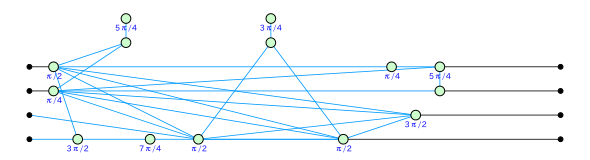

In [22]:
c = generate_H_S_CNOT_T_circuit(4, 50, p_t=0.4, seed=1001)

print("original")
print(c.stats_dict())
#zx.draw_matplotlib(c.to_graph())

g = c.to_graph()
zx.simplify.full_reduce(g)
zx.draw_matplotlib(g)

In [27]:
#画像取得

c = generate_H_S_CNOT_T_circuit(4, 30, p_t=0.4, seed=1001)

print("original")
print(c.stats_dict())
zx.draw(c.to_graph())

g = c.to_graph()
g2 =zx.teleport_reduce(g)
c2 = zx.Circuit.from_graph(g2)
zx.draw(g2)
print("after teleportation")
print(c2.stats_dict())
#zx.draw_matplotlib(c2.to_graph())

original
{'name': '', 'qubits': 4, 'gates': 30, 'tcount': 18, 'clifford': 12, 'twoqubit': 4, 'cnot': 4, 'had': 5, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


after teleportation
{'name': '', 'qubits': 4, 'gates': 23, 'tcount': 4, 'clifford': 19, 'twoqubit': 4, 'cnot': 4, 'had': 5, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
